# Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 3, 2
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8

[[0.04141633 0.03343265 0.00537959 0.00351565]
 [0.03343265 0.0483932  0.00389388 0.00381224]
 [0.00537959 0.00389388 0.01003537 0.00189932]
 [0.00351565 0.00381224 0.00189932 0.00383129]]
[[0.13022721 0.06182721 0.06634558 0.02210884]
 [0.06182721 0.08121633 0.0314449  0.01754694]
 [0.06634558 0.0314449  0.08364082 0.02626667]
 [0.02210884 0.01754694 0.02626667 0.01686667]]
[[0.26500816 0.09308163 0.16744218 0.03847347]
 [0.09308163 0.11588435 0.0552381  0.03342313]
 [0.16744218 0.0552381  0.18517007 0.0425415 ]
 [0.03847347 0.03342313 0.0425415  0.04201088]]


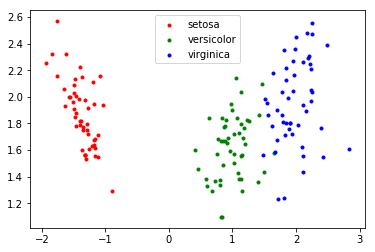

In [2]:
from sklearn import datasets
target_ids=[0,1,2]
iris = datasets.load_iris()
data = iris.data
labels = iris.target
Ndata = np.shape(data)[0]

Sw = np.zeros((4, 4))

C = np.cov(np.transpose(data))
# Loop over classes
classes = np.unique(labels)
for i in range(len(classes)):
# Find relevant datapoints
    indices = np.squeeze(np.where(labels==classes[i]))
    d = np.squeeze(data[indices,:])
    classcov = np.cov(d.T)
    Sw += np.float(np.shape(indices)[0])/Ndata * classcov
    print Sw
    
Sb = C - Sw
evals,evecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
w = evecs[:,:2]
n = np.dot(data,w)

for i, c,label in zip(target_ids, 'rgb',iris.target_names):
    plt.scatter(n[i == labels, 0], n[i == labels, 1], c = c,label=label, marker='.')
plt.legend()
plt.show()


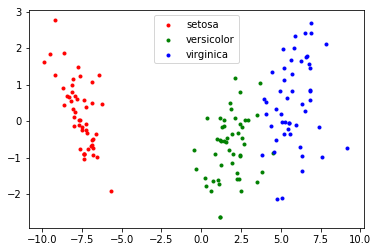

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
target_ids=[0,1,2]
lda = lda(n_components=2)
X_r2 = lda.fit(data, labels).transform(data)
for i, c, label in zip(target_ids, 'rgb',iris.target_names):
    plt.scatter(X_r2[i == labels, 0], X_r2[i == labels, 1], c = c,label=label, marker='.')
plt.legend()
plt.show()

# References
[
Machine Learning: An Algorithmic Perspective: Stephen Marsland ](http://dai.fmph.uniba.sk/courses/ICI/References/marsland.machine-learning.2ed.2015.pdf)